<a href="https://colab.research.google.com/github/vvalcristina/codenatioDesafioEnem/blob/master/Enem_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
from sklearn import metrics

In [0]:
train = pd.read_csv('train.csv', sep=",", encoding="UTF8")

In [0]:
test = pd.read_csv('test.csv',sep=",", encoding="UTF-8")

In [8]:
test.columns 

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [9]:
train.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

Verificação de quais colunas tem melhor correlação com NU_NOTA_MF

In [10]:
train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,...,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,0.005852,-0.003362,-0.006252,0.011372,0.006717,-0.000351,-0.000586,-0.000214,-0.011217,-0.013523,0.019805,0.003334,NaN,0.007724,0.004315,NaN,0.005417,0.004539,0.000268,0.012234,-0.004620,NaN,0.003231,0.001924,0.011940,-0.010889,-0.007018,-0.000171,NaN,0.003136,...,NaN,0.003352,NaN,NaN,NaN,0.004508,0.002816,0.048289,-0.004246,-0.004350,0.017135,0.017135,0.017073,0.017073,0.000970,-0.008336,-0.006097,0.006530,0.007925,0.000369,-0.002789,-0.004959,-0.004945,-0.003911,-0.011240,-0.006711,-0.002971,0.012977,0.000160,0.023548,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,0.025402,-0.032664,0.041738,0.018070,-0.035317,0.983407,0.983630,0.983488,0.080064,-0.055710,0.024364,0.001188,NaN,-0.010872,0.012790,NaN,-0.001965,0.000846,0.012051,0.003969,0.001007,NaN,-0.007271,0.008818,-0.030268,-0.009254,0.000398,-0.014474,NaN,-0.003578,...,NaN,0.003713,NaN,NaN,NaN,0.008911,-0.003259,0.991124,0.982100,0.981955,-0.035441,-0.035441,-0.034269,-0.034269,0.085643,0.124272,0.130161,0.108850,-0.098682,-0.017227,0.069971,0.048547,0.051289,0.062718,0.044335,0.061549,-0.117804,-0.073321,-0.079831,-0.025616,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,0.025822,-0.032538,0.041406,0.018145,-0.034944,0.983393,0.983417,0.983552,0.079229,-0.054736,0.024666,0.001360,NaN,-0.010716,0.013035,NaN,-0.001914,0.000934,0.011867,0.003689,0.001093,NaN,-0.007216,0.008782,-0.029933,-0.009503,0.000516,-0.014365,NaN,-0.003675,...,NaN,0.003689,NaN,NaN,NaN,0.008251,-0.002454,0.991177,0.981938,0.982035,-0.035438,-0.035438,-0.034287,-0.034287,0.084534,0.122825,0.128479,0.107493,-0.096473,-0.016955,0.069195,0.047746,0.050400,0.061881,0.043565,0.060629,-0.117288,-0.073029,-0.078885,-0.025491,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,-0.253403,0.681435,-0.296328,0.516253,-0.295091,-0.019091,-0.019710,-0.019013,-0.082980,0.009653,0.007082,0.027907,NaN,0.006520,0.011380,NaN,0.036361,0.000696,-0.006294,0.000492,-0.004355,NaN,0.023470,0.018252,0.004965,0.006482,0.010583,0.074384,NaN,0.026882,...,NaN,0.021091,NaN,

Verificando as distribuições

In [0]:
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

In [0]:
plt.style.use('ggplot')

In [0]:
%matplotlib inline

In [0]:
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

In [0]:
featuresCorr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

In [17]:
train[features].isnull().sum() #Verificação de nulos

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

In [0]:
correlation = train[featuresCorr].corr()

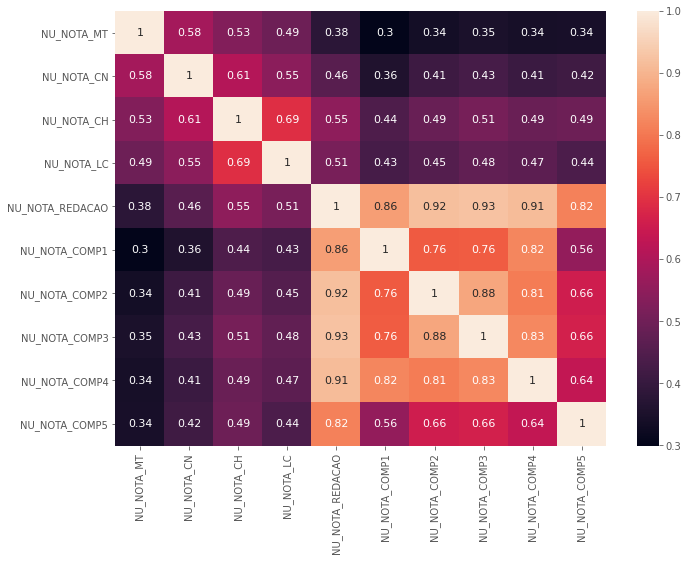

In [19]:
xaxis = plt.subplots(figsize=(11,8))
sns.heatmap(correlation, annot=True, annot_kws={"size": 11})


#Gráficos de distribuição de dados

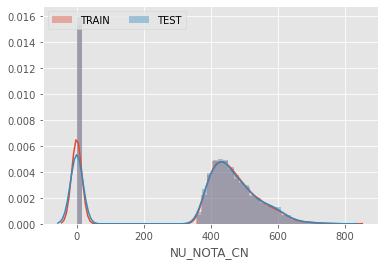

In [20]:
x0 = train['NU_NOTA_CN'].fillna(0)
x1 = test['NU_NOTA_CN'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left');



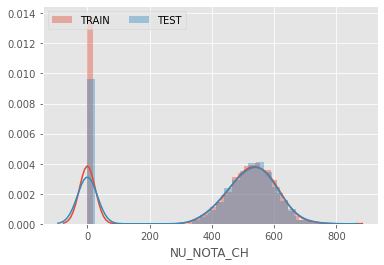

In [21]:
x2 = train['NU_NOTA_CH'].fillna(0)
x3 = test['NU_NOTA_CH'].fillna(0)

sns.distplot(x2)
sns.distplot(x3)
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left');

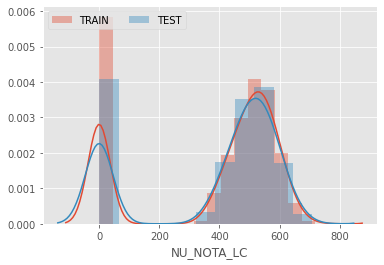

In [22]:
x4 = train['NU_NOTA_LC'].fillna(0)
x5 = test['NU_NOTA_LC'].fillna(0)

sns.distplot(x4)
sns.distplot(x5)
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left');

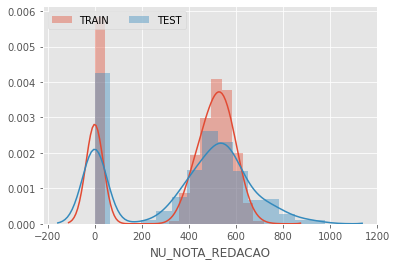

In [23]:
x6 = train['NU_NOTA_REDACAO'].fillna(0)
x5 = test['NU_NOTA_REDACAO'].fillna(0)

sns.distplot(x4)
sns.distplot(x5)
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left');

Nos gráficos acima grande parte das notas foram zeradas, pois valores (null == 0)
Procedimento para tratar esses zeros: remoção do dataset de treino desses valores para que o modelo treinado siga uma distribuição "normal".
Nota da Redação: Valor 0 quando não se atinge o critério

In [0]:
train = train.loc[(train['NU_NOTA_CN'].notnull()) & (train['NU_NOTA_CN']!=0) & 
                  (train['NU_NOTA_CH'].notnull()) & (train['NU_NOTA_CH']!=0) & 
                  (train['NU_NOTA_LC'].notnull())&(train['NU_NOTA_LC']!=0) & 
                  (train['NU_NOTA_REDACAO'].notnull()) & (train['NU_NOTA_REDACAO']!=0)]

In [25]:
train[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

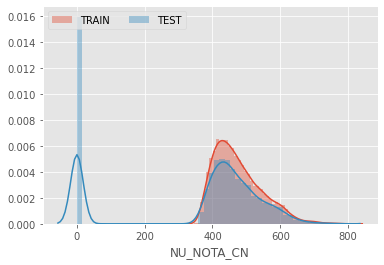

In [26]:
x0 = train['NU_NOTA_CN'].fillna(0)
x1 = test['NU_NOTA_CN'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left');

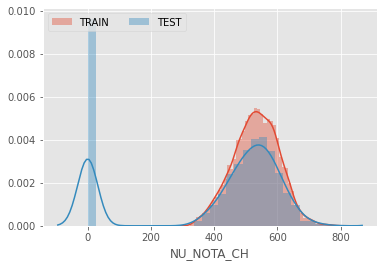

In [27]:
x2 = train['NU_NOTA_CH'].fillna(0)
x3 = test['NU_NOTA_CH'].fillna(0)

sns.distplot(x2)
sns.distplot(x3)
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left');

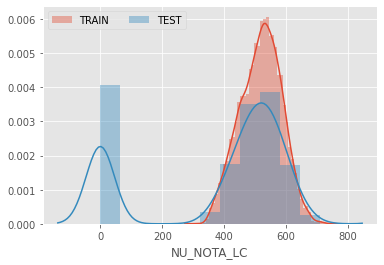

In [28]:
x4 = train['NU_NOTA_LC'].fillna(0)
x5 = test['NU_NOTA_LC'].fillna(0)

sns.distplot(x4)
sns.distplot(x5)
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left');

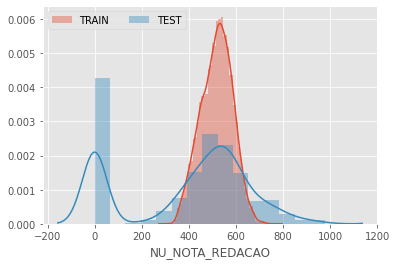

In [29]:
x6 = train['NU_NOTA_REDACAO'].fillna(0)
x5 = test['NU_NOTA_REDACAO'].fillna(0)

sns.distplot(x4)
sns.distplot(x5)
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left');

Prova do Enem: 2 dias


*   Dia 1:Linguagens e Códigos, Redação, Matemática
*   Dia 2: Ciências Humanas e Ciências da Natureza

Logo Lingugens e Códigos, Redação e Matemática. Se pegarmos a variável **TP_PRESENCA_LC** e se o aluno não esteve presente na prova de Linguagens e Códigos ele tirou 0 na Prova de Matemática. 




Selecionando valores diferentes de 0 e não nulos na base de test

In [0]:
test= test.loc[(test['NU_NOTA_CN'].notnull()) & (test['NU_NOTA_CN']!=0) & 
                  (test['NU_NOTA_CH'].notnull()) & (test['NU_NOTA_CH']!=0) & 
                  (test['NU_NOTA_LC'].notnull())&(test['NU_NOTA_LC']!=0) & 
                  (test['NU_NOTA_REDACAO'].notnull()) & (test['NU_NOTA_REDACAO']!=0)]

In [31]:
test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

**Construção dos Gráficos**

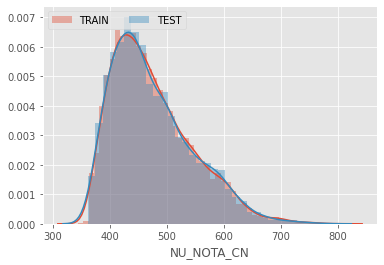

In [32]:
x0 = train['NU_NOTA_CN'].fillna(0)
x1 = test['NU_NOTA_CN'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left');

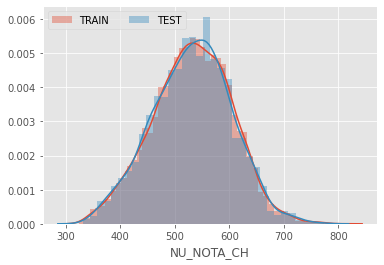

In [33]:
x2 = train['NU_NOTA_CH'].fillna(0)
x3 = test['NU_NOTA_CH'].fillna(0)

sns.distplot(x2)
sns.distplot(x3)
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left');

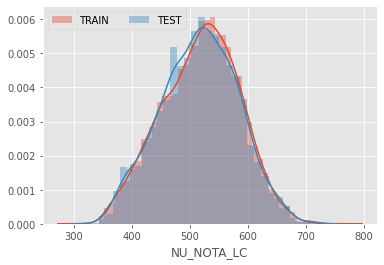

In [34]:
x4 = train['NU_NOTA_LC'].fillna(0)
x5 = test['NU_NOTA_LC'].fillna(0)

sns.distplot(x4)
sns.distplot(x5)
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left');

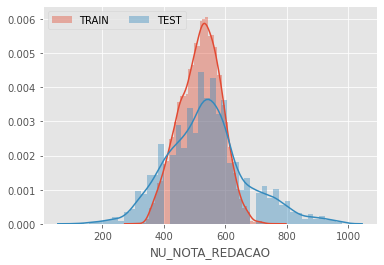

In [35]:
x6 = train['NU_NOTA_REDACAO'].fillna(0)
x5 = test['NU_NOTA_REDACAO'].fillna(0)

sns.distplot(x4)
sns.distplot(x5)
plt.legend(labels=['TRAIN', 'TEST'], ncol=2, loc='upper left');